In [250]:
# system
from datetime import datetime
from datetime import timedelta

# data processing and plotting
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yahooFinance

# ml/dl
from pmdarima import auto_arima, AutoARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Download data

In [251]:
BTCUSDInfo = yahooFinance.Ticker("BTC-USD")

# Retrieve stock data
# PERIOD:   1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y and ytd, max
# INTERVAL: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
BTCUSDData = pd.DataFrame(BTCUSDInfo.history(period="max", interval='1d'))

# save to file
BTCUSDData.to_csv('../data/btcusd.csv')

In [424]:
# load from file
df = pd.read_csv('../data/btcusd.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [425]:
# rename columns
df.columns = list(map(lambda x: x.lower(), df.columns))

# convert date
df.date = pd.to_datetime(df.date).dt.date #strftime("%Y-%m-%d %H:%M:%S")

# use data as index
df.set_index('date', inplace=True)
df.head()

,open,high,low,close,volume,dividends,stock splits
date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


## EDA

In [426]:
df.describe()

,open,high,low,close,volume,dividends,stock splits
count,3421.000000,3421.000000,3421.000000,3421.000000,3.421000e+03,3421.0,3421.0
mean,14804.147357,15149.219508,14432.437508,14815.112934,1.663384e+10,0.0,0.0
std,16322.751308,16712.588669,15885.970196,16324.858918,1.905750e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,922.179993,940.047974,915.846008,921.984009,1.728080e+08,0.0,0.0
50%,8315.665039,8509.110352,8140.933105,8309.286133,1.186534e+10,0.0,0.0
75%,24640.027344,25190.326172,24225.111328,24664.791016,2.696772e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


In [427]:
# drop last 2 columns
df = df.drop(['dividends', 'stock splits'], axis=1)
df.head()

,open,high,low,close,volume
date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [428]:
df.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [429]:
def tm_plot_price_data(df_price: pd.DataFrame, title: str = None, detailed: bool = False, figsize: tuple[int, int] = (7, 3)):
    # define figure
    plt.figure(figsize=figsize)
    plt.plot(df_price)

    # plot data
    plt.grid(c = 'gray', ls = '--', lw=0.4)
    if detailed:
        statdata = {
            'mean': (df_price.mean(), 'r'), 
            'median': (df_price.median(), 'g'),
        }
        
        # plot statdata
        for key, value in statdata.items():
            plt.text(x=df_price.index[0], y=value[0], s=key)
            plt.axhline(y=value[0], c=value[1], lw='0.7')
    
    # add info
    if title: plt.title(title)
    plt.ylabel('price')
    plt.xlabel('time')
    
    # plot
    plt.show()

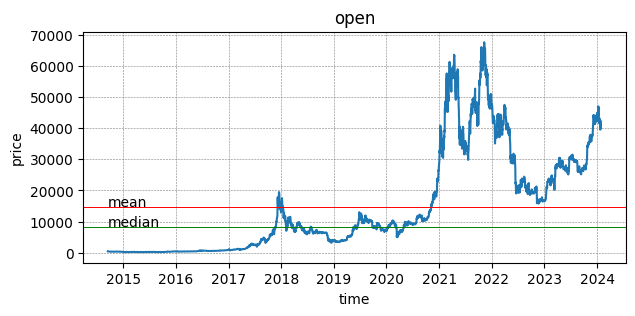

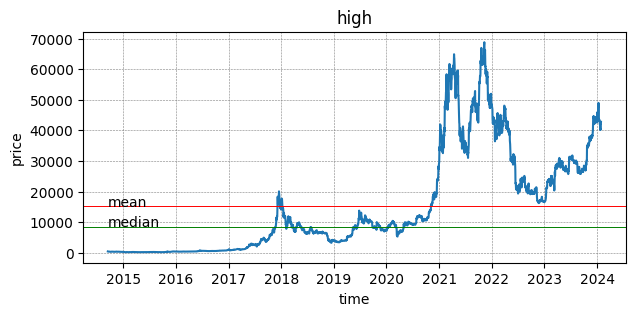

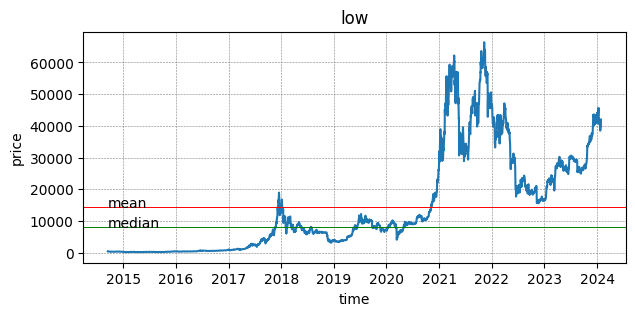

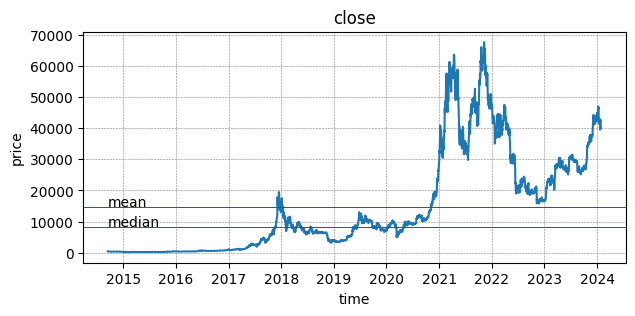

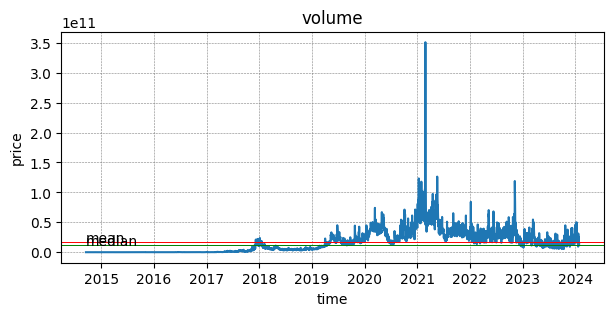

In [430]:
for colname in df.columns:
    tm_plot_price_data(df[colname], title=colname, detailed=True)

## Preprocessing

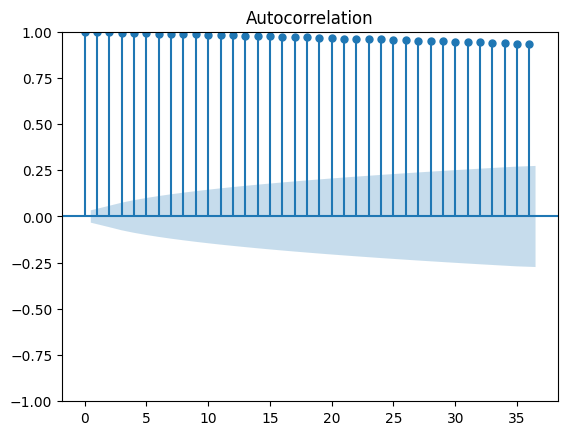

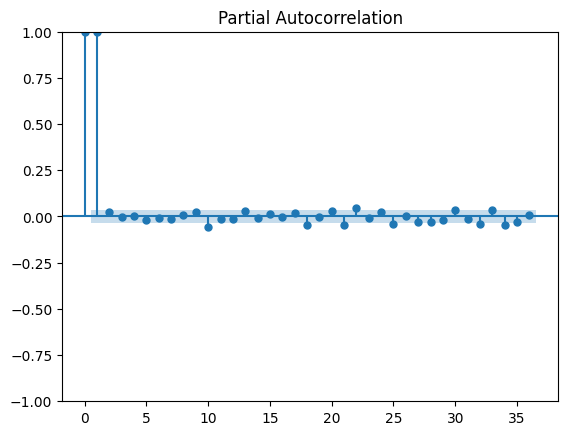

In [431]:
plot_acf(df.close)
plot_pacf(df.close)
plt.show()

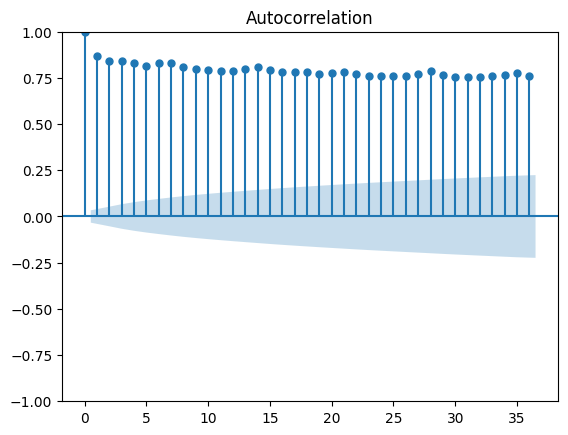

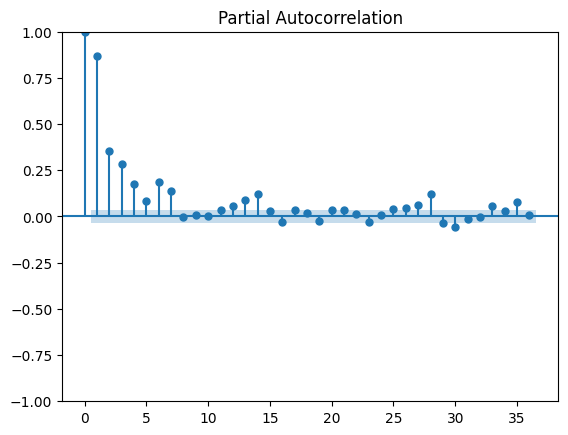

In [432]:
plot_acf(df.volume)
plot_pacf(df.volume)
plt.show()

In [433]:
# lets take the first difference and see what happens
# (out of curiosity)
df_1diff = df.diff()[1:]
df_1diff.head()

,open,high,low,close,volume
date,,,,,
2014-09-18,-9.004028,-11.314026,-39.317993,-32.894012,13426400.0
2014-09-19,-32.756989,-29.024994,-28.571991,-29.644012,3436500.0
2014-09-20,-29.429993,-4.539001,5.350983,14.108002,-1056100.0
2014-09-21,13.411987,-10.869995,3.298004,-10.082977,-10283500.0
2014-09-22,-8.984985,-5.510010,3.949005,3.330994,-2452500.0


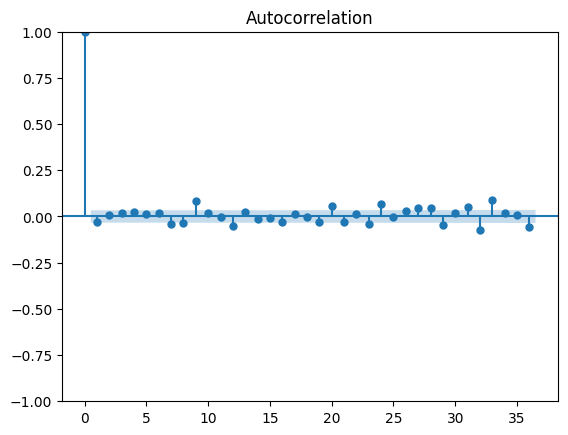

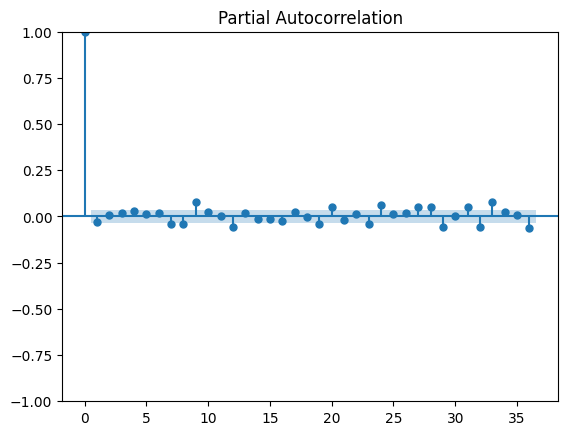

In [434]:
plot_acf(df_1diff.close)
plot_pacf(df_1diff.close)
plt.show()

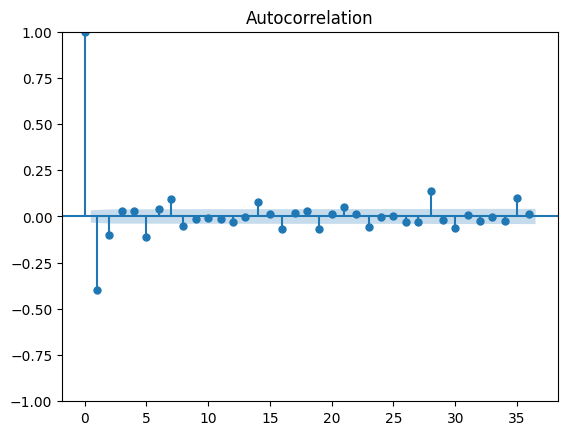

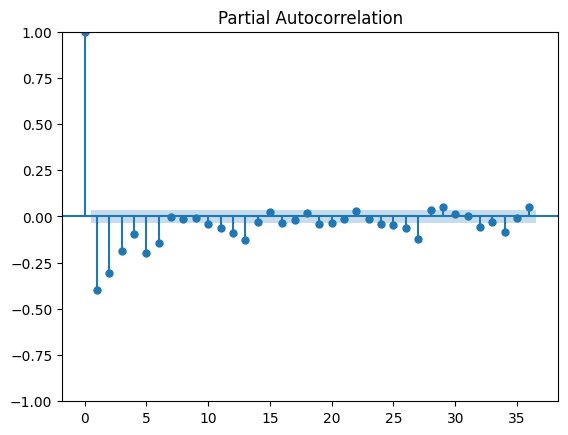

In [435]:
plot_acf(df_1diff.volume)
plot_pacf(df_1diff.volume)
plt.show()

Nothing changed much. Volume (p)acf plots have more variety than price data.

Anyways, we should try using volume in our model. It should be significant.

## Training

In [264]:
# split into train and test data
start_date, end_date = df.index[0], df.index[-1] - timedelta(days=7)
df_train = df[:end_date-timedelta(days=1)]
df_test = df[end_date:]

In [265]:
df_train.tail()

,open,high,low,close,volume
date,,,,,
2024-01-16,42499.335938,43566.273438,42085.996094,43154.945312,24062872740
2024-01-17,43132.101562,43189.890625,42189.308594,42742.652344,20851232595
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,25218357242
2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,25752407154
2024-01-20,41624.589844,41877.894531,41446.824219,41665.585938,11586690904


In [266]:
df_test.head()

,open,high,low,close,volume
date,,,,,
2024-01-21,41671.488281,41855.367188,41497.007812,41545.785156,9344043642
2024-01-22,41553.652344,41651.207031,39450.117188,39507.367188,31338708143
2024-01-23,39518.714844,40127.351562,38521.894531,39845.550781,29244553045
2024-01-24,39877.593750,40483.785156,39508.796875,40077.074219,22359526178
2024-01-25,40075.550781,40254.480469,39545.664062,39933.808594,18491782013


In [267]:
df.shape, df_train.shape, df_test.shape

((3421, 5), (3413, 5), (8, 5))

### AUTO ARIMA

In [268]:
model = AutoARIMA(
    # seasonal=False, 
    trace=True, 
    error_action='ignore', 
    suppress_warnings=True
).fit(y=df_train.close, x=df_train.close)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=55170.911, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=55181.251, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=55180.446, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=55180.502, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=55180.057, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=55182.995, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=55183.338, Time=0.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=55165.553, Time=3.00 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=55183.346, Time=0.63 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=55186.441, Time=0.92 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=55167.486, Time=2.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=55165.615, Time=1.54 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=55183.720, Time=1.47 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=55169.768, Time=4.19 sec
 ARIMA(3,1,2)(0,0,0

In [269]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3413
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -27575.776
Date:                Sun, 28 Jan 2024   AIC                          55165.553
Time:                        13:21:23   BIC                          55208.498
Sample:                    09-17-2014   HQIC                         55180.899
                         - 01-20-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.8296     15.347      0.706      0.480     -19.249      40.909
ar.L1          0.8159      0.012     67.791      0.000       0.792       0.839
ar.L2         -0.9492      0.010    -94.820      0.0

In [270]:
predictions = model.predict(n_periods=df_test.shape[0])
residuals = df_test.close - predictions

In [632]:
def tm_plot_pred_vs_data(predictions: pd.DataFrame, true_data: pd.DataFrame, figsize: tuple[int, int] = (7, 3)):
    residuals = true_data - predictions
    
    # plot residuals
    plt.figure(figsize=figsize)
    plt.plot(residuals)
    plt.title('Residuals from AR Model')
    plt.ylabel('Error')
    plt.axhline(0, color='r', linestyle='--', alpha=0.2)
    plt.xticks(size=figsize[0])
    plt.show()

    # plot predictions vs true data
    plt.figure(figsize=(7, 3))
    plt.plot(true_data)
    plt.plot(predictions)
    plt.legend(('Data', 'Predictions'))
    plt.title('Predicted vs true data')
    plt.ylabel('Sales')
    plt.xticks(size=figsize[0])
    plt.show()

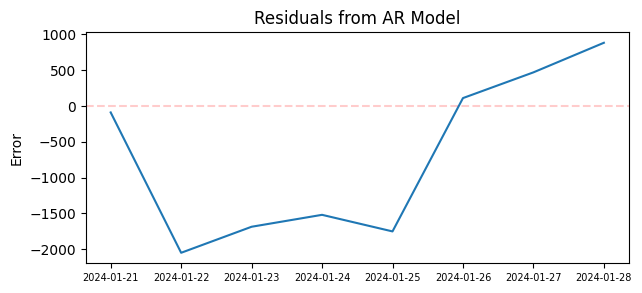

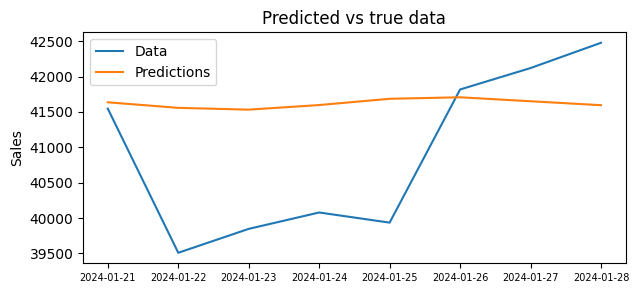

In [279]:
tm_plot_pred_vs_data(predictions, df_test.close)

In [273]:
mae = mean_absolute_error(df_test.close, predictions)
rmse = np.sqrt(mean_squared_error(df_test.close, predictions))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 1069.96
Root Mean Squared Error: 1296.24


## Simulation

### Utils

In [586]:
# appends row to time series dataframe (assumes date is used as index)
def df_append_row(df: pd.DataFrame, value: pd.Series):
    return pd.concat([
        df, 
        pd.DataFrame({df.index.name: value.index.date, df.columns[0]: value[0]}, index=[0]).set_index(df.index.name)
    ])


# runs the training process (unsupervised, without correcting for true value, using its predicted value for training)
def run_training_unsupervised(df_train: pd.DataFrame) -> pd.DataFrame:
    # train the model
    model = AutoARIMA(
        trace=False, 
        error_action='ignore', 
        suppress_warnings=True
    ).fit(y=df_train, x=df_train)
    
    # predict
    y_pred = model.predict(n_periods=1)
    
    # add it to the training dataset
    df_train = df_append_row(df_train, y_pred)
    
    return df_train


# runs the training process (supervised, correcting for true value and using its true value for training)
def run_training_supervised(df_train: pd.DataFrame) -> tuple[pd.DataFrame, pd.Series]:
    # train the model
    model = AutoARIMA(
        trace=False, 
        error_action='ignore', 
        suppress_warnings=True
    ).fit(y=df_train, x=df_train)
    
    # predict
    y_pred = model.predict(n_periods=1)
    
    return df_train, y_pred

---

In [471]:
"""
    This simulation is using its own predicted data
    to predict the future value for N periods.
    
    The predicted value isn't adjusted; the model is trained 
    using the previous values predicted by the model. 
"""
df_sim_train = df_train.close.reset_index().set_index('date')
df_sim_test = df_test.close.reset_index().set_index('date')
for i in range(df_sim_test.shape[0]):
    print(f'iteration {i:2d} | {df_sim_test.index[i]} | error ', end='')
    df_sim_train = run_training_unsupervised(df_sim_train)
    print(f'{((df_sim_test.iloc[i].values - df_sim_train.iloc[-1].values)/df_sim_test.iloc[i].values)[0]:2.2f}')
    

iteration  0 | 2024-01-21 | error -0.00
iteration  1 | 2024-01-22 | error -0.05
iteration  2 | 2024-01-23 | error -0.04
iteration  3 | 2024-01-24 | error -0.04
iteration  4 | 2024-01-25 | error -0.04
iteration  5 | 2024-01-26 | error 0.00
iteration  6 | 2024-01-27 | error 0.01
iteration  7 | 2024-01-28 | error 0.02


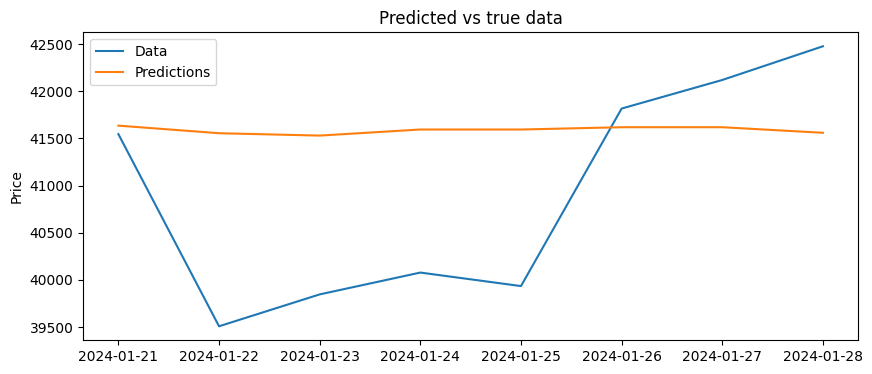

In [472]:
# get predicted
predicted = df_sim_train.loc[df_sim_test.index[0]:]

plt.figure(figsize=(10,4))
plt.plot(df_sim_test)
plt.plot(predicted)
plt.legend(('Data', 'Predictions'))
plt.title('Predicted vs true data')
plt.ylabel('Price')
plt.show()

In [473]:
mae = mean_absolute_error(df_sim_test, predicted)
rmse = np.sqrt(mean_squared_error(df_sim_test, predicted))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 1077.22
Root Mean Squared Error: 1286.18


---

In [500]:
"""
    This simulation is using the true values
    to predict the future value for N periods.
    
    It predicts for the next period, then recives 
    the true value, and predicts for next period using
    the true value, etc... 
"""
df_predictions = pd.DataFrame(columns=['date', 'price']).set_index('date')
df_sim_train = df_train.close.reset_index().set_index('date')
df_sim_test = df_test.close.reset_index().set_index('date')
for i in range(df_sim_test.shape[0]):
    print(f'iteration {i:2d} | {df_sim_test.index[i]} | error ', end='')
    
    # train the model and predict value for the next period
    df_sim_train, y_pred = run_training_supervised(df_sim_train)

    # append to predictions
    df_predictions = df_append_row(df_predictions, y_pred)
    
    # add true value to train for the next training iteration
    df_sim_train = pd.concat([df_sim_train, df_sim_test.iloc[[i]]])
    
    print(f'{((df_sim_test.iloc[i].values - df_predictions.iloc[-1].values)/df_sim_test.iloc[i].values)[0]:2.2f}')
    

iteration  0 | 2024-01-21 | error -0.00
iteration  1 | 2024-01-22 | error -0.05
iteration  2 | 2024-01-23 | error 0.01
iteration  3 | 2024-01-24 | error 0.00
iteration  4 | 2024-01-25 | error -0.00
iteration  5 | 2024-01-26 | error 0.05
iteration  6 | 2024-01-27 | error 0.01
iteration  7 | 2024-01-28 | error 0.01


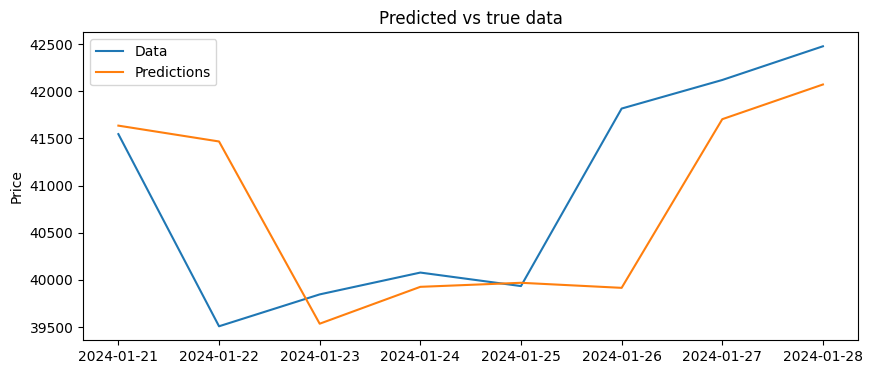

In [477]:
# get predicted
predicted = df_predictions

plt.figure(figsize=(10,4))
plt.plot(df_sim_test)
plt.plot(predicted)
plt.legend(('Data', 'Predictions'))
plt.title('Predicted vs true data')
plt.ylabel('Price')
plt.show()

In [476]:
mae = mean_absolute_error(df_sim_test, predicted)
rmse = np.sqrt(mean_squared_error(df_sim_test, predicted))
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 658.80
Root Mean Squared Error: 995.37


### Simulate strategies

#### No strategy (testing)

In [709]:
import random
from enum import Enum


class Strategies(Enum):
    """Trading Strategies."""
    NONE = 'none'
    RANDOM_CHOICE = "randomly select action, to buy/sell"
    AS_PREDICTED = "buy or sell as the model predicts"
    

class TradeAction(Enum):
    """Trading action."""
    NONE = 0
    BUY = 1
    SELL = -1
    

def run_simulation(
    df_sim_train: pd.DataFrame, 
    df_sim_true: pd.DataFrame, 
    n_periods: int = 7, 
    balance: float = 500, 
    lots: float = 0.01, 
    strategy: Strategies = Strategies.NONE,
    verbose: bool = True,
) -> tuple[pd.DataFrame, float]:
    """Run ARIMA model simulation

    Args:
        df_sim_train (pd.DataFrame): training data
        df_sim_true (pd.DataFrame): true data
        n_periods (int, optional): Predict N periods after true data is exausted (nothing is traded during this period). Defaults to 7.
        balance (float, optional): Initial balance. Defaults to 500.
        lots (float, optional): Action lots per deal. Defaults to 0.01.
        strategy (Strategies, optional): Trading strategy to use. Defaults to Strategies.NONE.
        verbose (bool, optional): Verbose output. Defaults to True.

    Returns:
        tuple[pd.DataFrame, float]: (predictions, balance)
    """
    # predicted list
    df_predictions = pd.DataFrame(columns=[df_sim_train.index.name, df_sim_train.columns[0]]).set_index(df_sim_train.index.name)
    
    # save initial balance value
    initial_balance = balance
    
    # track our trading action
    trade_action = TradeAction.NONE
    
    if verbose: print(f'Running simulation. Strategy chosen: {strategy}')
    
    # iterations
    for i in range(df_sim_true.shape[0]+n_periods):
        if verbose: print(f'iteration {i:2d} | {df_sim_true.index[0]+timedelta(days=i)} | ', end='')
        
        # train the model and predict value for the next period
        df_sim_train, y_pred = run_training_supervised(df_sim_train)

        # append to predictions
        df_predictions = df_append_row(df_predictions, y_pred)
        
        # update balance before next iteration
        initial_balance = balance
                
        if i < df_sim_true.shape[0]:
            # add true value to train for the next training iteration
            df_sim_train = pd.concat([df_sim_train, df_sim_true.iloc[[i]]])
            
            # trade based on selected strategy
            if strategy == Strategies.RANDOM_CHOICE:
                """
                    If action is none, initiate a trade.
                """
                if trade_action == TradeAction.NONE:
                    trade_action = TradeAction(1 if random.getrandbits(1) else -1)
                else:                    
                    # close the deal and adjust balance
                    balance = balance + lots * (df_sim_true.iloc[i].values - df_sim_true.iloc[i-1].values)[0] * trade_action.value
                    
                    # select new trading action
                    trade_action = TradeAction(1 if random.getrandbits(1) else -1)

            elif strategy == Strategies.AS_PREDICTED:
                """
                    Start trading once we have predicted values to work with.
                """
                if len(df_predictions) > 1:
                    # close the deal and adjust balance
                    balance = balance + lots * (df_sim_true.iloc[i].values - df_sim_true.iloc[i-1].values)[0] * trade_action.value
                    
                    # select new trading action: sell IF pred is lower than from previous day ELSE buy
                    # trade_action = TradeAction.SELL if (df_predictions.iloc[-1].values - df_sim_true.iloc[i-1].values)[0] < 0 else TradeAction.BUY
                    
                    # should use this: (shifted)
                    trade_action = TradeAction.SELL if (df_predictions.iloc[-1].values - df_sim_true.iloc[i-2].values)[0] < 0 else TradeAction.BUY
                    
                    # last iteration:
                    # trade_action = TradeAction.SELL if (df_predictions.iloc[-2].values - df_sim_true.iloc[i-1].values)[0] < 0 else TradeAction.BUY
            
            if verbose: 
                print(f'error {((df_sim_true.iloc[i].values - df_predictions.iloc[-1].values)/df_sim_true.iloc[i].values)[0]:.2f}% | ', end='')
        else:
            # use predicted value, add it to train dataset for the next training iteration
            df_sim_train = pd.concat([df_sim_train, df_predictions.iloc[[-1]]])
            
            # reset action
            trade_action = TradeAction.NONE
            
            if verbose: 
                print('error - | ', end='')
        
        if verbose: 
            print(f'balance {balance:.2f} | change {(100*(balance - initial_balance)/initial_balance):.2f}% | on next {trade_action}')
        
    return df_predictions, balance


def tm_plot_report(df_true: pd.DataFrame, df_predicted: pd.DataFrame, shifted: bool = False):
    # plot
    predicted = df_predicted.copy()
    if shifted: predicted.index = predicted.index - timedelta(days=1)
    tm_plot_pred_vs_data(predicted, df_true)
    
    # calculate error
    mae = mean_absolute_error(df_true, predicted[(1 if shifted else 0):len(df_true) + (1 if shifted else 0)])
    rmse = np.sqrt(mean_squared_error(df_true, predicted[(1 if shifted else 0):len(df_true) + (1 if shifted else 0)]))
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}')

In [699]:
# split into train and test data
start_date, end_date = df.index[0], df.index[-1] - timedelta(days=3)
df_train = df[:end_date-timedelta(days=1)]
df_true = df[end_date:]

# transform data
df_sim_train = df_train.close.reset_index().set_index('date')
df_sim_true = df_true.close.reset_index().set_index('date')

In [700]:
# run simulation
df_predictions, _ = run_simulation(df_sim_train=df_sim_train, df_sim_true=df_sim_true, n_periods=3)

Running simulation. Strategy chosen: Strategies.NONE
iteration  0 | 2023-11-29 | error 0.00% | balance 500.00 | change 0.00% | on next TradeAction.NONE
iteration  1 | 2023-11-30 | error -0.00% | balance 500.00 | change 0.00% | on next TradeAction.NONE
iteration  2 | 2023-12-01 | error 0.03% | balance 500.00 | change 0.00% | on next TradeAction.NONE
iteration  3 | 2023-12-02 | error 0.02% | balance 500.00 | change 0.00% | on next TradeAction.NONE
iteration  4 | 2023-12-03 | error 0.01% | balance 500.00 | change 0.00% | on next TradeAction.NONE
iteration  5 | 2023-12-04 | error 0.05% | balance 500.00 | change 0.00% | on next TradeAction.NONE
iteration  6 | 2023-12-05 | error 0.05% | balance 500.00 | change 0.00% | on next TradeAction.NONE
iteration  7 | 2023-12-06 | error -0.01% | balance 500.00 | change 0.00% | on next TradeAction.NONE
iteration  8 | 2023-12-07 | error -0.01% | balance 500.00 | change 0.00% | on next TradeAction.NONE
iteration  9 | 2023-12-08 | error 0.02% | balance 500

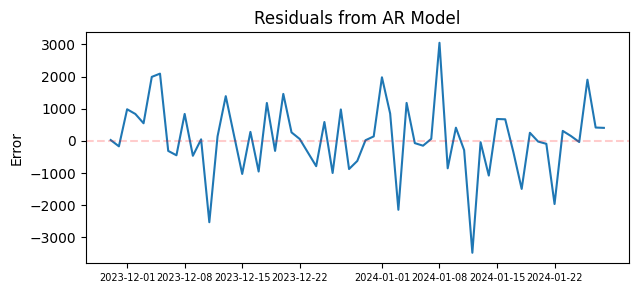

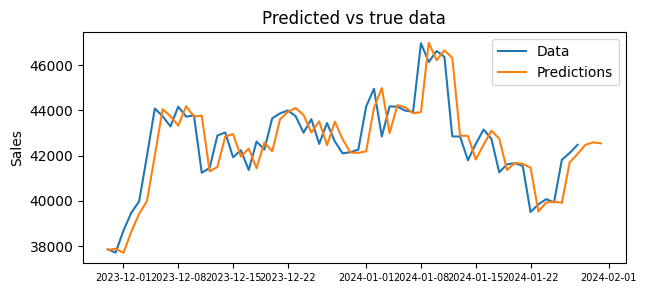

Mean Absolute Error: 790.92
Root Mean Squared Error: 1110.61


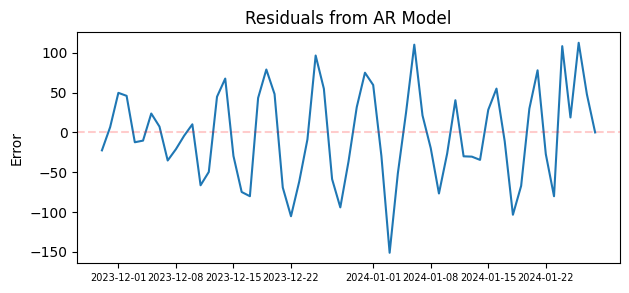

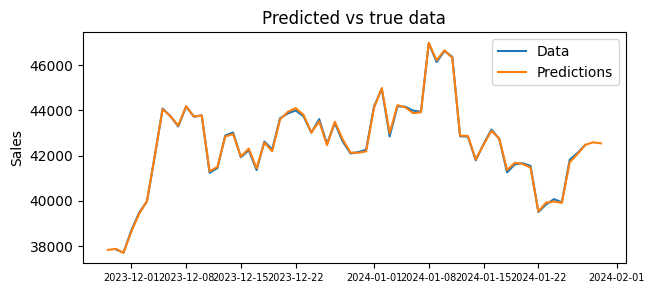

Mean Absolute Error: 49.21
Root Mean Squared Error: 59.01


In [701]:
tm_plot_report(df_sim_true, df_predictions)
tm_plot_report(df_sim_true, df_predictions, shifted=True)

### Random choice

In [702]:
# split into train and test data
start_date, end_date = df.index[0], df.index[-1] - timedelta(days=30)
df_train = df[:end_date-timedelta(days=1)]
df_true = df[end_date:]

# transform data
df_sim_train = df_train.close.reset_index().set_index('date')
df_sim_true = df_true.close.reset_index().set_index('date')

# run simulation
df_predictions, _ = run_simulation(
    df_sim_train=df_sim_train, 
    df_sim_true=df_sim_true, 
    n_periods=3,
    balance=500,
    lots=0.01,
    strategy=Strategies.RANDOM_CHOICE,
    verbose=True,
)

Running simulation. Strategy chosen: Strategies.RANDOM_CHOICE
iteration  0 | 2023-12-29 | error -0.01% | balance 500.00 | change 0.00% | on next TradeAction.SELL
iteration  1 | 2023-12-30 | error 0.00% | balance 499.43 | change -0.11% | on next TradeAction.BUY
iteration  2 | 2023-12-31 | error 0.00% | balance 500.51 | change 0.22% | on next TradeAction.BUY
iteration  3 | 2024-01-01 | error 0.04% | balance 519.53 | change 3.80% | on next TradeAction.BUY
iteration  4 | 2024-01-02 | error 0.02% | balance 527.44 | change 1.52% | on next TradeAction.SELL
iteration  5 | 2024-01-03 | error -0.05% | balance 548.53 | change 4.00% | on next TradeAction.SELL
iteration  6 | 2024-01-04 | error 0.03% | balance 535.22 | change -2.43% | on next TradeAction.BUY
iteration  7 | 2024-01-05 | error -0.00% | balance 535.04 | change -0.03% | on next TradeAction.SELL
iteration  8 | 2024-01-06 | error -0.00% | balance 536.78 | change 0.32% | on next TradeAction.SELL
iteration  9 | 2024-01-07 | error 0.00% | ba

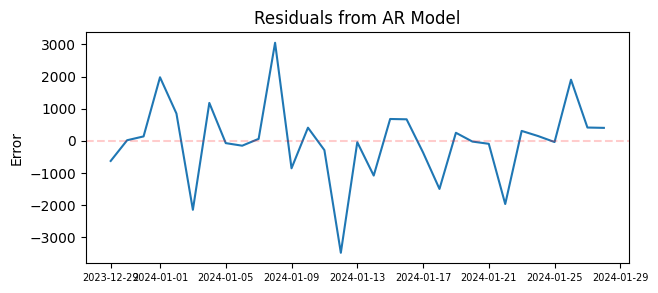

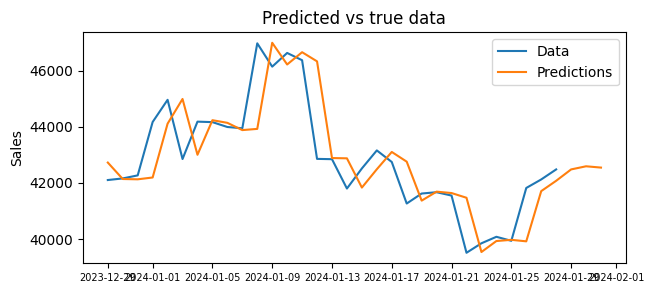

Mean Absolute Error: 811.15
Root Mean Squared Error: 1215.55


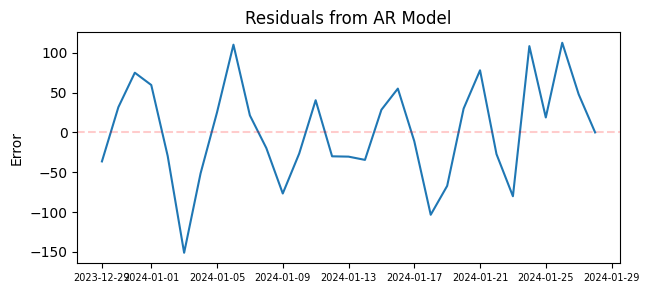

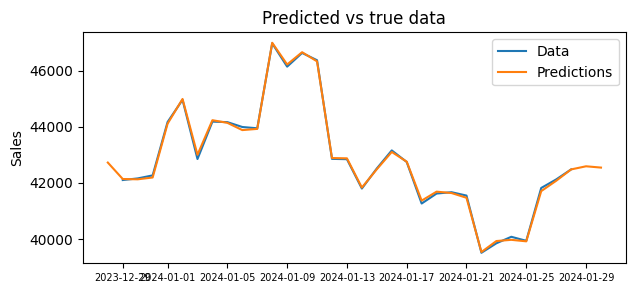

Mean Absolute Error: 52.23
Root Mean Squared Error: 63.06


In [704]:
tm_plot_report(df_sim_true, df_predictions)
tm_plot_report(df_sim_true, df_predictions, shifted=True)

### AS_PREDICTED
Buy on bullish and sell on bearish price predictions

In [710]:
# split into train and test data
start_date, end_date = df.index[0], df.index[-1] - timedelta(days=60)
df_train = df[:end_date-timedelta(days=1)]
df_true = df[end_date:]

# transform data
df_sim_train = df_train.close.reset_index().set_index('date')
df_sim_true = df_true.close.reset_index().set_index('date')

# run simulation
df_predictions, _ = run_simulation(
    df_sim_train=df_sim_train, 
    df_sim_true=df_sim_true, 
    n_periods=3,
    balance=500,
    lots=0.01,
    strategy=Strategies.AS_PREDICTED,
    verbose=True,
)

Running simulation. Strategy chosen: Strategies.AS_PREDICTED
iteration  0 | 2023-11-29 | error 0.00% | balance 500.00 | change 0.00% | on next TradeAction.NONE
iteration  1 | 2023-11-30 | error -0.00% | balance 500.00 | change 0.00% | on next TradeAction.SELL
iteration  2 | 2023-12-01 | error 0.03% | balance 490.24 | change -1.95% | on next TradeAction.SELL
iteration  3 | 2023-12-02 | error 0.02% | balance 482.36 | change -1.61% | on next TradeAction.BUY
iteration  4 | 2023-12-03 | error 0.01% | balance 487.38 | change 1.04% | on next TradeAction.BUY
iteration  5 | 2023-12-04 | error 0.05% | balance 507.40 | change 4.11% | on next TradeAction.BUY
iteration  6 | 2023-12-05 | error 0.05% | balance 528.41 | change 4.14% | on next TradeAction.BUY
iteration  7 | 2023-12-06 | error -0.01% | balance 525.07 | change -0.63% | on next TradeAction.BUY
iteration  8 | 2023-12-07 | error -0.01% | balance 520.53 | change -0.86% | on next TradeAction.SELL
iteration  9 | 2023-12-08 | error 0.02% | bala

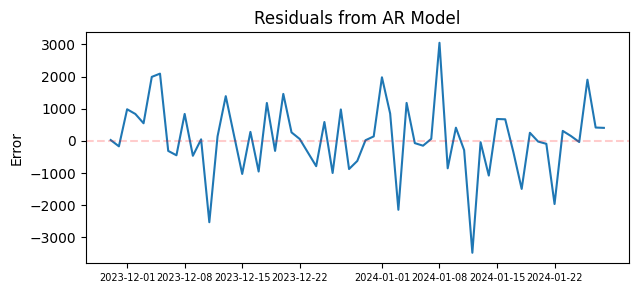

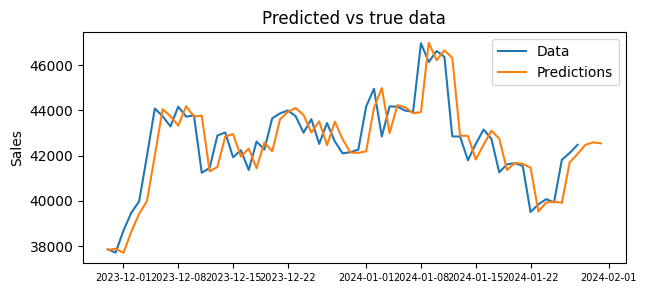

Mean Absolute Error: 790.92
Root Mean Squared Error: 1110.61


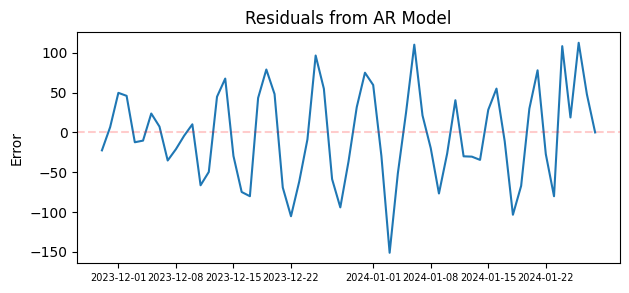

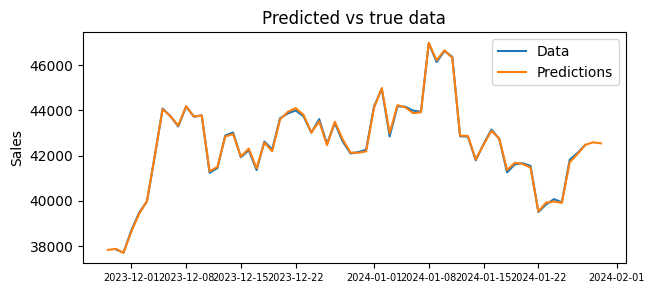

Mean Absolute Error: 49.21
Root Mean Squared Error: 59.01


In [708]:
tm_plot_report(df_sim_true, df_predictions)
tm_plot_report(df_sim_true, df_predictions, shifted=True)